In [1]:
# Goal: write algorithm to determine if graph is connected, using
# Depth First Search/exploration 

In [2]:
import numpy as np # use for arrays

In [3]:
import networkx as nx # for drawing graphs

In [24]:
visited = [] # list to keep track of which vertices have been visited 
# visited[i] will be True if i has been visited, False otherwise. 
# will be changed by is_connected, and explore 
def is_connected(A):
    global visited # tells the function that visited has a global meaning 
    """Returns true iff the given by adjacency matrix A is connected.
    Uses depth first search."""
    num_vert = len(A)
    visited = [False for i in range(num_vert)] # initially, no vertices have been visited
    # changes the global copy of visited, since visited was declared global.  
    
    explore(A,0) # explore graph starting at vertex 0
    # graph is connected if all vertices are explored when we start at 0 
    # now check whether whole graph is explored
    if False in visited:  # some vertex is not visited 
        return False
    else:
        return True
    
# helper function for the above 
def explore(A,v):
    """Explore vertices accessible from v that haven't been visited yet."""
    global visited 
    
    num_vert = len(A) 
    
    visited[v] = True # mark v as visited 
    print(v)  # for testing purposes; can get rid of
    
    # go through list of unvisited neighbors 
    for i in range(num_vert):
        if A[v,i]==1 and visited[i]==False: # tests whether i neighbors v and is unvisited
            explore(A,i)
    
    

In [23]:
# test out explore on tree; each vertex shares an edge with vertex above
#     0
#   1    2
#  3 4  5 6
A1 = np.array([[0,1,1,0,0,0,0], [1,0,0,1,1,0,0], [1,0,0,0,0,1,1],[0,1,0,0,0,0,0], \
               [0,1,0,0,0,0,0], [0,0,1,0,0,0,0],[0,0,1,0,0,0,0]])
visited = [False for i in range(len(A1))]
explore(A1,0)
visited

0
1
3
4
2
5
6


[True, True, True, True, True, True, True]

In [25]:
# test out is_connected on graph A1 from above
is_connected(A1)

0
1
3
4
2
5
6


True

In [26]:
# random graph code copied from last time:

# Fixed edges model: control the number of vertices and number of edges 
import numpy as np 

def rand_graph(num_v, num_e):
    """Returns a random graph with num_v vertices and num_e edges. 
    Represented as an numpy array giving the adjacency matrix.
    Pick two distinct vertices randomly, add an edge between if there isn't one already.
    Repeat this process until we have num_e edges."""
    A = np.zeros((num_v,num_v)) # adjacency matrix, start off all zeros
    e_so_far = 0 # number of edges added so far
    while e_so_far < num_e:
        # Choose two vertices randomly
        i = randint(0,num_v-1)
        j = randint(0,num_v-1)
        if i!=j and A[i,j]==0:  # tests whether i,j are different, and no edge yet
            A[i,j]=1  # add edge
            A[j,i]=1
            e_so_far += 1
    # note: above loop would be infinite if num_e is greater than number of pairs of
    # distinct vertices
    return A

0
6
2
7
5
9
3
1
8


False

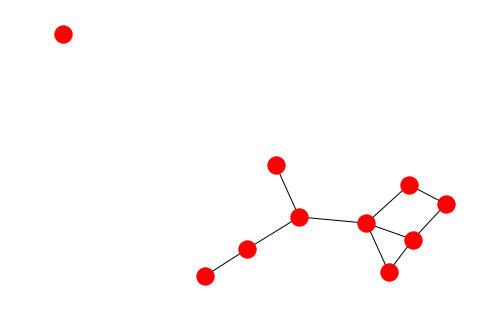

In [32]:
# test out is_connected on random graph 
A2=rand_graph(10,10)
nx.draw(nx.Graph(A2))
is_connected(A2)